# Results on the performance of the nodule segmentation networks

In [106]:
from pathlib import Path
import pickle
from IPython.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs
sbs.set()
%matplotlib inline

In [4]:
HISTORY_RESULTS_PATH = Path("/mnt/Data/LUNA/weights")
EVALUATION_RESULTS_PATH = Path("/mnt/Data/LUNA/results")

In [75]:
training_history_dfs = {
    p.name.split(".h5.history")[0]: pd.DataFrame(pickle.load(p.open('rb')))
    for p in HISTORY_RESULTS_PATH.glob("*.h5.history")
}

## Lung segmentation network
This network is a UNET, with batch normalization applied on the convolutional layers. Trained with (1-dice) as a loss function, no augmentation. I've used the provided LUNA lung masks as ground truth. Just using the DICE score to
evaluate how close the numbers are.

I used all slices on the dataset for training, although on each epoch only 10% of the total were used. This 10% was sampled at random at the end of each epoch.

Subsets 0 to 7 used for training. Subset 8 for validation. Subset 9 just for testing.

### loss evolution over time

Text(0,0.5,'loss [fn = 1-DICE]')

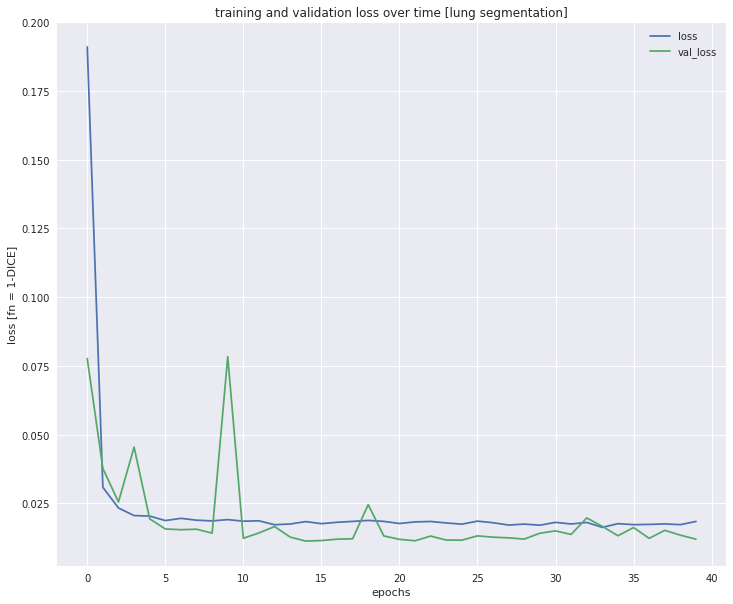

In [30]:
ax = training_history_dfs["lung_segmentation_e5b2112"][["loss", "val_loss"]].plot(figsize=(12,10))
ax.set_title("training and validation loss over time [lung segmentation]")
ax.set_xlabel("epochs")
ax.set_ylabel("loss [fn = 1-DICE]")

### final score

Evaluation of the lung segmentation network

### mean DICE score ###


,dice_coef
split,
test,0.984037
training,0.977392
validation,0.983458



### variance DICE score ###


,dice_coef
split,
test,0.000070
training,0.002422
validation,0.000075



### min DICE score ###


,dice_coef
split,
test,0.951863
training,0.310153
validation,0.945443



### max DICE score ###


,dice_coef
split,
test,0.994039
training,0.993657
validation,0.992977


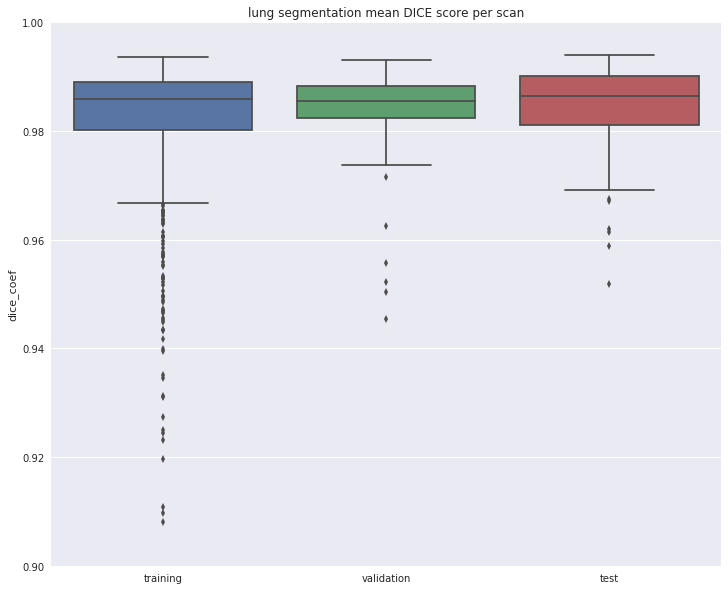

In [121]:
evaluation_dfs = [
    pd.read_csv(p.open())
    for p in sorted((EVALUATION_RESULTS_PATH / "evaluation_lung_segmentation_e5b2112/").glob("*_subset*.csv"))
]
training_df = pd.concat(evaluation_dfs[0:8])
training_df["split"] = "training"
validation_df = evaluation_dfs[8]
validation_df["split"] = "validation"
test_df = evaluation_dfs[9]
test_df["split"] = "test"
evaluation_df = pd.concat([training_df, validation_df, test_df], ignore_index=True)
print("Evaluation of the lung segmentation network")
print("\n### mean DICE score ###")
display(HTML(pd.DataFrame(evaluation_df.groupby("split")["dice_coef"].mean()).to_html()))
print("\n### variance DICE score ###")
display(HTML(pd.DataFrame(evaluation_df.groupby("split")["dice_coef"].var()).to_html()))
print("\n### min DICE score ###")
display(HTML(pd.DataFrame(evaluation_df.groupby("split")["dice_coef"].min()).to_html()))
print("\n### max DICE score ###")
display(HTML(pd.DataFrame(evaluation_df.groupby("split")["dice_coef"].max()).to_html()))
# Show boxplot
fig, ax = plt.subplots(figsize=(12,10))
ax = sbs.boxplot(x="split", y="dice_coef", data=evaluation_df, ax=ax)
ax.set_title("lung segmentation mean DICE score per scan")
ax.set_xlabel("")
ax.set_ylim([0.9, 1.0])
plt.show()


## Nodule segmentation network

In [76]:
list(training_history_dfs.keys())

nodule_segmentation_no_augmentation_no_normalization_binary_crossentropy_7626e71

['nodule_segmentation_no_augmentation_normalization_binary_crossentropy_7626e71',
 'nodule_segmentation_augmentation_normalization_dice_ce1dfcd',
 'nodule_segmentation_no_augmentation_no_normalization_binary_crossentropy_7626e71',
 'lung_segmentation_e5b2112',
 'nodule_segmentation_no_augmentation_normalization_dice_7626e71']

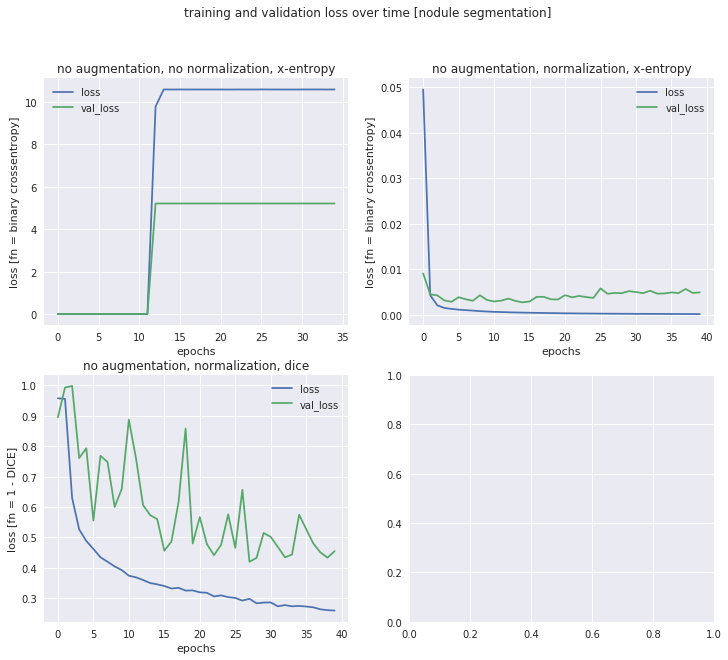

In [90]:
f, ax_arr = plt.subplots(2, 2, figsize=(18, 20))

ax = training_history_dfs["nodule_segmentation_no_augmentation_no_normalization_binary_crossentropy_7626e71"][["loss", "val_loss"]].plot(figsize=(12,10), ax=ax_arr[0,0])
ax.set_title("no augmentation, no normalization, x-entropy")
ax.set_xlabel("epochs")
ax.set_ylabel("loss [fn = binary crossentropy]")

ax = training_history_dfs["nodule_segmentation_no_augmentation_normalization_binary_crossentropy_7626e71"][["loss", "val_loss"]].plot(figsize=(12,10), ax=ax_arr[0,1])
ax.set_title("no augmentation, normalization, x-entropy")
ax.set_xlabel("epochs")
ax.set_ylabel("loss [fn = binary crossentropy]")

ax = training_history_dfs["nodule_segmentation_no_augmentation_normalization_dice_7626e71"][["loss", "val_loss"]].plot(figsize=(12,10), ax=ax_arr[1,0])
ax.set_title("no augmentation, normalization, dice")
ax.set_xlabel("epochs")
ax.set_ylabel("loss [fn = 1 - DICE]")

f.suptitle("training and validation loss over time [nodule segmentation]")
plt.show()

In [98]:
evaluation_network_dfs = []
for nodule_segmentation_results in EVALUATION_RESULTS_PATH.glob("evaluation_nodule*"):
    network_name = " ".join(nodule_segmentation_results.name.split("_")[3:-1])
    evaluation_dfs = [
        pd.read_csv(p.open())
        for p in sorted((nodule_segmentation_results).glob("evaluation_subset*.csv"))
    ]
    training_df = pd.concat(evaluation_dfs[0:8])
    training_df["split"] = "training"
    validation_df = evaluation_dfs[8]
    validation_df["split"] = "validation"
    test_df = evaluation_dfs[9]
    test_df["split"] = "test"
    evaluation_df = pd.concat([training_df, validation_df, test_df], ignore_index=True)
    evaluation_df["network"] = network_name
    evaluation_network_dfs.append(evaluation_df)
evaluation_networks_df = pd.concat(evaluation_network_dfs, ignore_index=True)

In [110]:
evaluation_networks_df.head()
print("\n\n### mean score ###")
display(HTML(evaluation_networks_df.groupby(["network", "split"])["dice", "sensitivity", "FP"].mean().to_html()))
print("\n\n### variance score ###")
display(HTML(evaluation_networks_df.groupby(["network", "split"])["dice", "sensitivity", "FP"].var().to_html()))



### mean score ###




### variance score ###
